# Ego Networks


> Ego-centric analysis shifts the analytical lens onto a sole ego actor and concentrates on the local pattern of relations in which that ego is embedded as well as the types of resources to which those relations provide access. (Carolan, 2014, ch. 7)

The concept of *ego-centric networks* is pitched against *sociocentric networks* that we've been exploring in the past few weeks. Some researchers also refer to ego-centric networks as *ego networks* or *personal networks*. 

Ego-centric and sociocentric networks are distinct in several important ways:

- **Unbounded versus bounded networks**. Sociocentric SNA attempts to collect data on ties between all members of a socially or geographically-bounded group and has limited inference beyond that group. Egocentric SNA assesses individuals' personal networks across any number of social settings using name generators, and is therefore less limited in theoretical and substantive scope.
- **Focus on individual rather than group outcomes**. Sociocentric SNA often focuses on network structures of groups as predictors of group-level outcomes (e.g. concentration of power, resource distribution, information diffusion). In contrast, egocentric SNA is concerned with how people's patterns of interaction shape their individual-level outcomes (e.g. health, voting behavior, employment opportunities).
- **Flexibility in data collection**. Because sociocentric SNA must use a census of a particular bounded group as its sampling frame, data collection is very time-consuming, expensive, and targeted to a specific set of research questions. In contrast, because egocentric SNA uses individuals as cases, potential sampling frames and data collection strategies are virtually limitless. Egocentric data collection tools can easily be incorporated into large-scale or nationally-representative surveys being fielded for a variety of other purposes.

Ego-centric networks are useful when the foci of the research are individuals in a network, if capturing the complete network is less important, and/or when the researcher plan to correlate *attribute data* of individuals with their *relational* characteristics in a network. Examples of ego-centric networks' applications abound. 

## Readings

- Carolan, B. V. (2014). Social network analysis and education: Theory, methods & applications (Ch. 7). SAGE Publications.
- Lukács J., Á., & Dávid, B. (2023). Connecting for success: Egocentric network types among underrepresented minority students at college. Social Networks, 72, 35–43. https://doi.org/10.1016/j.socnet.2022.09.002
- [Optional] Marsden, P. V. (2002). Egocentric and sociocentric measures of network centrality. Social Networks, 24(4), 407–422. https://doi.org/10.1016/S0378-8733(02)00016-3


<!-- 
As we explored in [Week 3](ch3.html), ego-centric networks can be used to investigate stroke patients' health behaviors. In education, for example, @Dawson2010-se studies high and low-performing students based on their ego-networks. 

Below, James Cook -- a sociology professor we've been watching -- nicely explains how studying ego-centric networks would be helpful.

<iframe width="560" height="315" src="https://www.youtube.com/embed/SM08TsCldWI" frameborder="0" allowfullscreen></iframe> 
-->


When reading, consider this question: **How ego-centric networks could be applied to your research projects?** You do not necessarily need to focus on your class project but projects in your field in general.




## Collecting Ego Network Data

As discussed in the reading (Carolan, 2014), there are basically two ways to construct ego-centric networks:

1. **Ego-centric networks by design**: When a research project is initiated by asking ego-centric questions, ego-centric data are usually directed collecting. For example, when a *name generator questionnaire* is distributed to a sample of students in a large high school to study in-school friendship of students, each student's response will be directly used to construct a network.
2. **Derived ego-centric networks**: When a complete network can be captured, we can also derive ego-centric networks by filtering network data. For example, if we're analyzing our own Slack discussions, we can also create an ego-centric network for each one of us to investigate our connectedness in the class. 

In either of these conditions, an important decision to make is how you define the **neighborhood** of the ego-centric network, or how many steps does an ego can reach. This will again be informed by theories and contextual information you bring to bear. 

Consider this question: **What definition of the *neighborhood* will make sense for your research projects?**

## Building ego networks from egos

Have you ever noticed that Google would provide autocomplete suggestions when you Google something? 

Below, I type 'chatgpt vs' and Google provides a list of suggestions.

![](img/googlevs.png)

If we consider the initial search term (e.g. 'chatgpt') as the ego, the list of suggested counterparts are alters. The ego, alters, and their ties for an ego network. 

Using code below, we can construct such the ego network for 'chatgpt'. Notice that we are not only interested in identifying the alters but also their inter-connections. So after getting the initial list of suggestions, we need to run the Google queries again for each alter to identify their connections.  

In [1]:
import requests
import pandas as pd
import networkx as nx

# This is the ego
search_term = 'chatgpt'

# Build Google search query
url = f'https://suggestqueries.google.com/complete/search?&client=firefox&gl=us&hl=en&q={search_term}%20vs%20'
response = requests.get(url)

# Make the query
if response.status_code == 200:
    data = response.json()
    # Now 'data' contains the JSON data from the URL
    print(data)
else:
    print('Failed to retrieve data:', response.status_code)

['chatgpt vs ', ['chatgpt vs copilot', 'chatgpt vs gemini', 'chatgpt vs bard', 'chatgpt vs claude', 'chatgpt vs openai', 'chatgpt vs gpt 4', 'chatgpt vs microsoft copilot', 'chatgpt vs perplexity', 'chatgpt vs chatgpt plus', 'chatgpt vs copilot vs gemini'], [], {'google:suggestsubtypes': [[512], [512], [512], [512], [512], [512], [512], [512], [512], [512, 433, 131]]}]


In [2]:
# Extract a list of suggestions
initial_suggestions = [element.replace('chatgpt vs ', '') for element in data[1]]
# Remove combo items such as 'gemini vs copilot'
initial_suggestions = [element for element in initial_suggestions if 'vs' not in element]
# print(initial_suggestions)

# Create an edge list data frame
df_edge_list = pd.DataFrame({'source': ['chatgpt'] * len(initial_suggestions), 'target': initial_suggestions})

print(df_edge_list)

    source             target
0  chatgpt            copilot
1  chatgpt             gemini
2  chatgpt               bard
3  chatgpt             claude
4  chatgpt             openai
5  chatgpt              gpt 4
6  chatgpt  microsoft copilot
7  chatgpt         perplexity
8  chatgpt       chatgpt plus


In [3]:
# Now iterate on the list of alters, and identify their own alters
# When doing so, iteratively add edge lists to the main edge list
for term in initial_suggestions:
    if 'vs' in term: # skip alters that have two parts (such as gemini vs copilot)
        continue
    
    print(f'querying {term}')
    url = f"https://suggestqueries.google.com/complete/search?&client=firefox&gl=us&hl=en&q={term}%20vs%20"
    response = requests.get(url)

    if response.status_code == 200:
        data = response.json()
    else:
        print('Failed to retrieve data:', response.status_code)
    
    suggestions = [element.replace(f'{term} vs ', '') for element in data[1]]
    suggestions = [element for element in suggestions if 'vs' not in element]

    # Create a DataFrame
    df_tmp = pd.DataFrame({'source': [term] * len(suggestions), 'target': suggestions})

    # Concatenate the current DataFrame with the final DataFrame
    df_edge_list = pd.concat([df_edge_list, df_tmp], ignore_index=True)

# Let's check out the final edge list
df_edge_list

querying copilot
querying gemini


querying bard


querying claude
querying openai


querying gpt 4
querying microsoft copilot


querying perplexity
querying chatgpt plus


,source,target
0,chatgpt,copilot
1,chatgpt,gemini
2,chatgpt,bard
3,chatgpt,claude
4,chatgpt,openai
...,...,...
91,chatgpt plus,team reddit
92,chatgpt plus,enterprise
93,chatgpt plus,gemini advanced
94,chatgpt plus,chatgpt


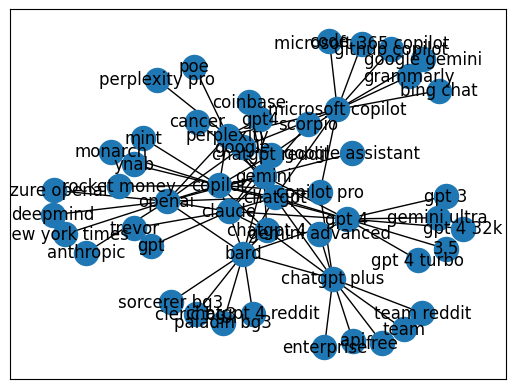

In [4]:
# Create a network object
G = nx.from_pandas_edgelist(df_edge_list)

# We can visualize this network, which has more than the ego network we want
nx.draw_networkx(G)


26

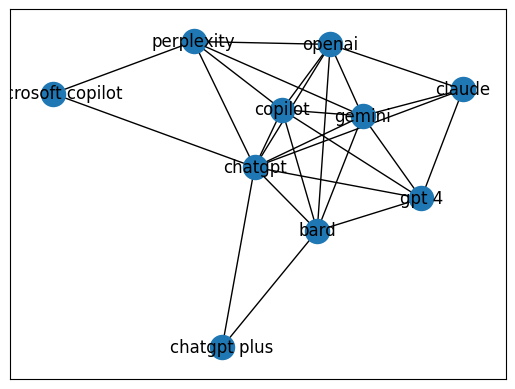

In [5]:
# Extract an ego network for chatgpt
EG = nx.ego_graph(G, 'chatgpt', distance = 'distance', radius = 1)

# Visualize the ego network
nx.draw_networkx(EG)

# Run network analysis algorithms on the ego network
nx.density(EG)

EG.size()

If you'd like to build an ego network of another term -- say Gemini -- you can start from the ego following the same approach to cover alters and ties in the neighborhood you intend to cover. 

## Extracting Ego Networks from Larger Networks

Another approach is to extract ego networks from a much larger network.

Below, let's consider an open dataset about [Primary school dynamic contacts](https://networks.skewed.de/net/sp_primary_school). Here is the description of the dataset:

> Two temporal networks of contacts among students and teachers at a primary school in Lyon, France, on consecutive days of in October 2009. Each network accumulates all contacts over the course of a single day; contacts were sampled at 20-second intervals.

Using code below, we first read the network data from the website, construct the whole network, and then derive ego networks of interested egos. 

In [6]:
import zipfile
import io

# This URL is from the dataset's webpage: https://networks.skewed.de/net/sp_primary_school
zip_url = 'https://networks.skewed.de/net/sp_primary_school/files/sp_primary_school.csv.zip'
sub_dir = 'data/sp_primary_school' # where you'd like to extract files
edges_file = 'edges.csv' # name of edges file
nodes_file = 'nodes.csv' # name of nodes file

# Download the zip file
response = requests.get(zip_url)
if response.status_code == 200:
    # Extract the zip file
    with zipfile.ZipFile(io.BytesIO(response.content)) as zip_ref:
        zip_ref.extractall(sub_dir)
    print('Extraction complete.')
else:
    print('Failed to download the zip file:', response.status_code)

Extraction complete.


In [7]:
import os

nodes = pd.read_csv(os.path.join(sub_dir, nodes_file), sep=',')
# nodes = nodes.rename(columns={'class': 'group', '# index': 'index'})
nodes = nodes.set_axis(['ind', 'raw_id', 'group', 'gender', 'pos'], axis='columns') # rename the columns
nodes

,ind,raw_id,group,gender,pos
0,0,1558,3B,M,"array([-1.74555536, -3.28500536])"
1,1,1567,3B,M,"array([-1.72030544, -3.26474249])"
2,2,1560,3B,F,"array([-1.71955628, -3.25207655])"
3,3,1570,3B,F,"array([-1.67965811, -3.2940906 ])"
4,4,1574,3B,F,"array([-1.7003117 , -3.28849509])"
...,...,...,...,...,...
237,237,1750,5B,M,"array([-1.80754116, -3.07109776])"
238,238,1715,2B,F,"array([-1.91644382, -3.36835294])"
239,239,1744,3B,M,"array([-1.67574526, -3.31140817])"
240,240,1799,1A,Unknown,"array([-1.75033375, -3.37851526])"


In [8]:
edges = pd.read_csv(os.path.join(sub_dir, edges_file), sep=',')
# edges = edges.rename(columns={'# source': 'source'})
edges = edges.set_axis(['source', 'target', 'time'], axis='columns') # rename the columns
edges

,source,target,time
0,0,1,31220
1,0,1,31240
2,0,16,31260
3,0,1,31260
4,0,16,31280
...,...,...,...
125768,241,112,148040
125769,241,112,148060
125770,241,112,148080
125771,241,112,148100


### Construct the full network with nodes and edges

In [9]:
G_sp = nx.Graph()

# Add nodes -- let's add each node on by one and store 'position' as a node attribute
for _, row in nodes.iterrows():
    G_sp.add_node(row['ind'], group=row['group'], gender=row['gender'], position = row['pos'])

# Add edges with attributes from the DataFrame to the graph
for _, row in edges.iterrows():
    G_sp.add_edge(row['source'], row['target'], time = row['time'])

/var/folders/ws/bwvb7bg1107311r6961dd1y80000gp/T/ipykernel_53194/3968682777.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('tab10', len(groups))


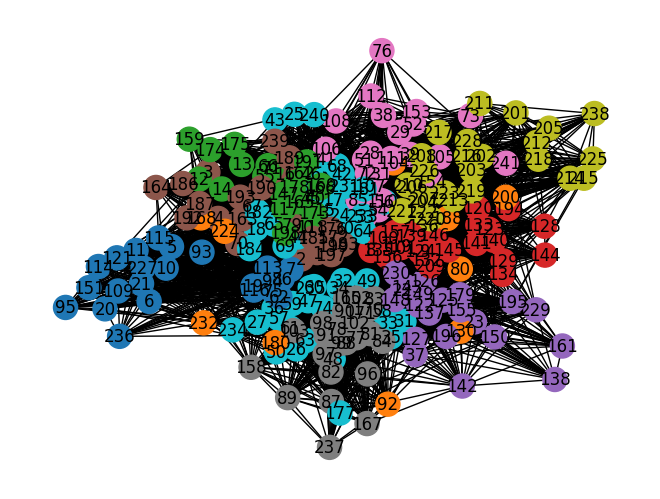

In [10]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Get unique group names
groups = set(nx.get_node_attributes(G_sp, 'group').values())

# Generate a color map
cmap = cm.get_cmap('tab10', len(groups))

# Create a color mapping based on group names
node_colors = [cmap(list(groups).index(G_sp.nodes[node]['group'])) for node in G_sp.nodes()]

# Draw the graph
pos = nx.spring_layout(G_sp)
nx.draw(G_sp, pos, node_color=node_colors, with_labels=True)

# Display the graph
plt.show()

### Let's focus on ego 76

First, set radius to 1.

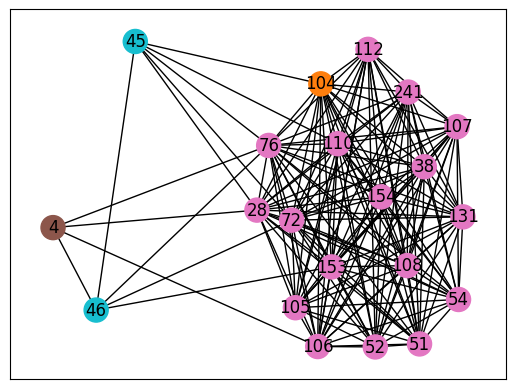

In [11]:
# Extract an ego network for chatgpt
EG = nx.ego_graph(G_sp, 76, radius = 1)

# Visualize the ego network
node_colors = [cmap(list(groups).index(EG.nodes[node]['group'])) for node in EG.nodes()]
nx.draw_networkx(EG, node_color=node_colors, with_labels=True)

We can also set radius to 2 to reach a larger neighhood of the ego.

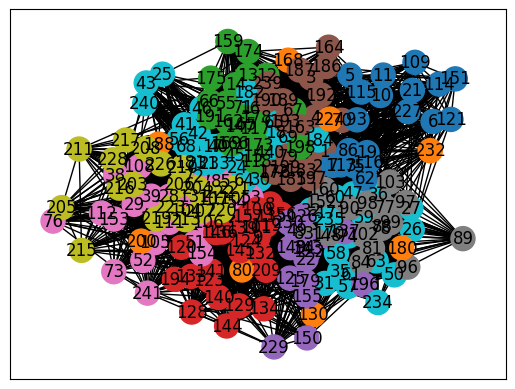

In [12]:
# Extract an ego network for chatgpt
EG = nx.ego_graph(G_sp, 76, radius = 2)
# Visualize the ego network
node_colors = [cmap(list(groups).index(EG.nodes[node]['group'])) for node in EG.nodes()]
nx.draw_networkx(EG, node_color=node_colors, with_labels=True)

Because the sample network is dense, the ego network gets large quickly when increasing the radius.

Please feel free to adapt the code samples to your own projects.